<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-1-Sprint-4-Build-Week-1/blob/master/Unit_1_Build_Week_Bo_Warburton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Racial Justice in Connecticut Department of Children and Families Child Welfare Placements

Abstract

Making reasonable efforts to keep families together is recognized as an important part of achieving successful outcomes in child welfare social work. Part of that is placing children with relatives, as opposed to putting them in a group home or in foster care, when it becomes necessary to remove them from home. In this article, I look at data regarding relative care placements in by the Connecticut Department of Children and Families (DCF) and ask if ethnicity affects placement type.

Background

In 1990, Connecticut signed a consent decree ending a class-action lawsuit that alleged "dangerous and unlawful policies and practices" by child protective services authorities. The consent decree specified 22 outcome measures, established a federally-appointed monitor, and required DCF to build a statewide computer system. DCF then awarded American Management Systems a $13 million systems integration and custom application develoment contract, naming the system LINK. I was a business systems analyst on that project.

Data

This dataset came out of LINK (as modified over the years). It lists initial placement type by month, DCF office, and ethnicity. It is available to the public at https://catalog.data.gov/dataset/children-entering-dcf-placement-annual-trend-by-race-ethnicity.

Question

Does DCF treat children impartially with regard to placing them with extended family? In the language of statistics, my null hypothesis is that all children are equally likely to be placed with relatives.

Findings

The dataset has DCF office, region, ethnicity, and initial placement by month. The raw numbers shown here indicate that that Hispanic and White children are placed with extended family more often than Other and Black. My rationale for including the margin of error is that this data, being from one fiscal year, is a sample of all possible years.

Visualization: Raw numbers indicate favorable treatment of White and Hispanic

Of course, raw numbers aren't as important as percentages. The charts below show placement rates as percentage of total placements for the entire time period and by month.

Visualization: Percentages indicate favorable treatment of White, but not Hispanic

The table below showw the results of ANOVA testing. Based on a t value of 17.34 and a p value of 0, I reject the null hypothesis and conclude that ethnicity does affect placement in relative care.

Table: ANOVA tests


Conclusion

There are many assumptions and unknows, including that relative care is better, ratio of children in care to total population, trends over time, differences between DCF office or DCF regions, and ultimate outcomes.

## Data wrangling

### Import and examine the data

In [0]:
import numpy as np
import pandas as pd

In [130]:
# Children Entering DCF Placement: Annual Trend by Race/Ethnicity
# "This dataset contains aggregate data concerning the number of children who entered DCF placement
# during a given SFY (July 1 – June 30).  These figures are broken out by the DCF Region and Office
# responsible for the child's care, the child's Race/Ethnicity, and the Placement Type category
# into which the child was initially placed."
# https://catalog.data.gov/dataset/children-entering-dcf-placement-annual-trend-by-race-ethnicity
df_original = pd.read_csv('https://raw.githubusercontent.com/BoWarburton/data/master/dcf.csv')
df_original.head(100)

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
0,08/06/2015,Other,Other,BLACK,2005,77,3,2,0,0,2,0,1,45,0,1,23,0,0,Race
1,08/06/2015,Other,Other,HISPANIC,2005,70,6,0,0,0,1,0,2,41,0,2,18,0,0,Race
2,08/06/2015,Other,Other,OTHER,2005,23,0,0,0,0,0,0,0,21,0,0,2,0,0,Race
3,08/06/2015,Other,Other,WHITE,2005,61,2,5,0,0,1,0,4,40,0,1,8,0,0,Race
4,08/06/2015,Region 1,Bridgeport Office,BLACK,2005,126,64,12,1,3,19,11,2,10,2,0,1,1,0,Race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,08/06/2015,Region 3,Norwich Office,WHITE,2006,141,59,28,2,2,17,5,2,12,1,2,1,9,1,Race
96,08/06/2015,Region 3,Willimantic Office,BLACK,2006,7,3,1,2,0,1,0,0,0,0,0,0,0,0,Race
97,08/06/2015,Region 3,Willimantic Office,HISPANIC,2006,34,19,3,1,0,6,4,0,1,0,0,0,0,0,Race
98,08/06/2015,Region 3,Willimantic Office,OTHER,2006,12,4,5,0,0,1,1,0,1,0,0,0,0,0,Race


In [131]:
# 966 rows, each showing number of children in each placement by ethnicity, year, and office
df_original.shape

(966, 20)

In [132]:
# Each row has an integer for placements in one month by ethnicity, office, and region
df_original.dtypes

Data_as_of                 object
DCF Region                 object
DCF Office                 object
Demographic                object
SFY                         int64
TOTAL_ENTRY                 int64
FOSTER_CARE                 int64
RELATIVE_CARE               int64
SPECIAL_STUDY               int64
THERAPEUTIC_FOSTER_CARE     int64
PDC_SAFE_HOME               int64
SHELTER                     int64
GROUP_HOME                  int64
RESIDENTIAL                 int64
DCF_HIGHMEADOWS             int64
DCF_SOLNIT                  int64
DCF_CJTS                    int64
HOSPITAL                    int64
INDEPENDENT_LIVING          int64
Demographic_Type           object
dtype: object

In [133]:
# There are 22 DCF offices
df_original['DCF Office'].value_counts().shape

(22,)

In [134]:
# Data cover 14 fiscal years
df_original['SFY'].value_counts()

2017    128
2012     72
2011     72
2013     67
2014     65
2010     64
2009     64
2007     64
2006     64
2005     64
2008     63
2016     60
2015     60
2018     59
Name: SFY, dtype: int64

In [135]:
# There are not always 4 entries per year for each office
# 22 offices * 4 ethnicities * 14 years would = 1,232
df_original['DCF Office'].value_counts()

Manchester Office       60
Milford Office          60
Norwich Office          60
New Britain Office      60
Hartford Office         60
Meriden Office          60
Willimantic Office      60
New Haven Office        60
Bridgeport Office       60
Norwalk Office          60
Waterbury Office        60
Danbury Office          59
Middletown Office       59
Torrington Office       55
Stamford Office         37
Unassigned_Office       32
Other                   24
Gen'l Administration    22
Hotline                  9
Aftercare                6
Spec Invest. Unit        2
Treatment Services       1
Name: DCF Office, dtype: int64

In [136]:
# There are no null values to be cleaned up
df_original.isnull().sum()

Data_as_of                 0
DCF Region                 0
DCF Office                 0
Demographic                0
SFY                        0
TOTAL_ENTRY                0
FOSTER_CARE                0
RELATIVE_CARE              0
SPECIAL_STUDY              0
THERAPEUTIC_FOSTER_CARE    0
PDC_SAFE_HOME              0
SHELTER                    0
GROUP_HOME                 0
RESIDENTIAL                0
DCF_HIGHMEADOWS            0
DCF_SOLNIT                 0
DCF_CJTS                   0
HOSPITAL                   0
INDEPENDENT_LIVING         0
Demographic_Type           0
dtype: int64

In [137]:
df_original.describe(include=[np.number])

,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,2011.808489,38.890269,16.948240,8.331263,1.387164,1.041408,3.057971,1.607660,0.760870,2.783644,0.072464,0.386128,1.075569,1.024845,0.413043
std,4.080482,39.466052,19.235207,10.122565,2.163570,1.959260,5.431891,2.361677,1.353468,4.864568,0.316928,0.770555,3.020394,1.920547,0.931985
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,10.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,25.000000,10.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,55.000000,23.000000,12.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2018.000000,220.000000,129.000000,57.000000,14.000000,18.000000,40.000000,14.000000,10.000000,45.000000,3.000000,6.000000,34.000000,18.000000,9.000000


In [138]:
df_original.describe(exclude=[np.number])

,Data_as_of,DCF Region,DCF Office,Demographic,Demographic_Type
count,966,966,966,966,966
unique,3,8,22,8,1
top,09/19/2017,Region 3,Manchester Office,Non-Hispanic White,Race
freq,524,179,60,150,966


In [139]:
# All the values in Demographic_Type are 'Race', so this can be dropped
df_original.Demographic_Type.value_counts()

Race    966
Name: Demographic_Type, dtype: int64

In [140]:
# There are two different ways of coding each ethnicity. Why is this?
# If they are duplicates, I can merge them; otherwise, it may be bad data
df_original['Demographic'].value_counts()

Non-Hispanic White    150
Hispanic              150
Non-Hispanic Black    146
Non-Hispanic Other    137
OTHER                  96
HISPANIC               96
WHITE                  96
BLACK                  95
Name: Demographic, dtype: int64

In [141]:
# Digging into the two different ways of coding ethnicity
df_original[df_original['DCF Office']=='Hotline']

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
461,09/19/2017,Region 0,Hotline,Hispanic,2012,4,1,3,0,0,0,0,0,0,0,0,0,0,0,Race
462,09/19/2017,Region 0,Hotline,Non-Hispanic Black,2012,3,0,0,0,0,3,0,0,0,0,0,0,0,0,Race
597,09/19/2017,Region 0,Hotline,Non-Hispanic Other,2014,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Race
659,09/19/2017,Region 0,Hotline,Hispanic,2015,1,0,1,0,0,0,0,0,0,0,0,0,0,0,Race
660,09/19/2017,Region 0,Hotline,Non-Hispanic Black,2015,2,0,1,0,0,0,1,0,0,0,0,0,0,0,Race
834,09/19/2017,Region 0,Hotline,Non-Hispanic White,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,Race
837,09/19/2017,Region 0,Hotline,Hispanic,2017,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Race
898,09/19/2017,Region 0,Hotline,Non-Hispanic White,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,Race
901,09/19/2017,Region 0,Hotline,Hispanic,2017,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Race


In [142]:
# Is the column "Data_as_of" meaningful at all? There are only 3 unique entries. Sometimes it is many years after State Fiscal Year
df_original['Data_as_of'].value_counts()

09/19/2017    524
08/06/2015    383
11/07/2018     59
Name: Data_as_of, dtype: int64

In [143]:
df_original[df_original['Data_as_of']=='11/07/2018'].head()

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
907,11/07/2018,Region 3,Willimantic Office,Hispanic,2018,35,21,6,2,0,0,3,0,0,0,0,0,2,1,Race
908,11/07/2018,Region 4,Manchester Office,Non-Hispanic White,2018,82,26,42,2,1,3,0,0,0,0,1,0,6,1,Race
909,11/07/2018,Region 1,Bridgeport Office,Hispanic,2018,56,15,21,3,10,0,0,0,6,0,0,1,0,0,Race
910,11/07/2018,Region 6,New Britain Office,Non-Hispanic White,2018,67,13,43,3,1,1,0,0,0,0,0,0,6,0,Race
911,11/07/2018,Region 1,Norwalk Office,Non-Hispanic Black,2018,26,8,10,5,0,0,0,1,1,0,0,0,0,1,Race


In [144]:
df_original[df_original['SFY']==2010].head()

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
319,08/06/2015,Other,Other,BLACK,2010,58,2,0,0,0,0,0,10,24,0,0,22,0,0,Race
320,08/06/2015,Other,Other,HISPANIC,2010,41,4,1,0,0,2,0,2,18,0,0,14,0,0,Race
321,08/06/2015,Other,Other,OTHER,2010,6,0,0,0,0,3,0,0,2,0,0,1,0,0,Race
322,08/06/2015,Other,Other,WHITE,2010,31,0,0,0,0,0,0,2,23,0,0,6,0,0,Race
323,08/06/2015,Region 1,Bridgeport Office,BLACK,2010,73,27,13,2,3,8,11,1,5,0,0,2,1,0,Race


There are no null values, but I do have the following steps to take for data cleaning.

1. Remove unneeded columns: "Data_as_of", if that makes sense (or convert it to datetime if not), and "Demographic_Type" which has only one value, presumably because this is a subset from a larger database that had other demographic types.

2. Fix column names. Capitalization and spacing is inconsistent; I will put column names in lowercase and replace spaces with underscores for convenience

3. Find and fix inconsistent coding of ethnicity

4. Tidy data. The dataset, 966 rows, each row giving numbers of children by type of placement, ethnicity, and so on, is not in tidy format. I will need to have tidy dataframes in order to do some things. A complete tidy dataframe will have these columns: sfy (the index), demographic, placement_type, count, dcf_region, dcf_office. I can drop dcf_region and dcf_office since I won't be using those for this analysis.

5. Pivot data. For my purposes, I will want these pivot tables:

  5.1 relative care placements by sfy, white, black, hispanic, other

  5.2 relative care percentages by sfy, white, black, hispanic, other

Some other notes on the data

*   "TOTAL_ENTRY" is a pre-engineered feature, the sum of all other placement types. This will be useful because I am most interested in the ratio of relative care to total placements
*   I thought "SFY" would be State Fiscal Year, but it does not correspond to the dates in "Data_as_of". But this doesn't matter for this analysis, where I am interested in ratios rather than annual trends

### Remove unneeded columns

In [145]:
# Make a simpler dataframe name and drop the column Demographic_Type
df_dcf = df_original
drop_columns = ['Demographic_Type', 'Data_as_of']
df_dcf = df_dcf.drop(columns = drop_columns)
df_dcf.shape

(966, 18)

### Fix column names

In [146]:
# Put column names in lower case
df_dcf.columns = map(str.lower, df_dcf.columns)
# Replace spaces in column names with underscores
df_dcf = df_dcf.rename(columns = {'dcf region':'dcf_region', 'dcf office':'dcf_office'})
df_dcf.dtypes

dcf_region                 object
dcf_office                 object
demographic                object
sfy                         int64
total_entry                 int64
foster_care                 int64
relative_care               int64
special_study               int64
therapeutic_foster_care     int64
pdc_safe_home               int64
shelter                     int64
group_home                  int64
residential                 int64
dcf_highmeadows             int64
dcf_solnit                  int64
dcf_cjts                    int64
hospital                    int64
independent_living          int64
dtype: object

### Find and fix inconsistent coding

In [147]:
# To recap: "Demographic" has values in UPPER CASE and Title Case
df_dcf.demographic.value_counts()

Non-Hispanic White    150
Hispanic              150
Non-Hispanic Black    146
Non-Hispanic Other    137
OTHER                  96
HISPANIC               96
WHITE                  96
BLACK                  95
Name: demographic, dtype: int64

In [148]:
# Are the upper-case rows meant to be repeats, samples, or independent values?
df_dcf.loc[(df_dcf['demographic'] == 'Hispanic') | (df_dcf['demographic'] == 'HISPANIC')].sort_values(by=['sfy'])

,dcf_region,dcf_office,demographic,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
1,Other,Other,HISPANIC,2005,70,6,0,0,0,1,0,2,41,0,2,18,0,0
61,Region 6,New Britain Office,HISPANIC,2005,123,59,22,1,1,12,9,6,5,0,1,0,4,3
57,Region 6,Meriden Office,HISPANIC,2005,60,42,4,0,0,4,3,1,5,1,0,0,0,0
53,Region 5,Waterbury Office,HISPANIC,2005,110,73,17,1,0,5,2,1,9,0,1,1,0,0
49,Region 5,Torrington Office,HISPANIC,2005,7,6,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,Region 2,New Haven Office,Hispanic,2018,53,33,8,3,3,2,0,1,2,0,0,0,0,1
909,Region 1,Bridgeport Office,Hispanic,2018,56,15,21,3,10,0,0,0,6,0,0,1,0,0
907,Region 3,Willimantic Office,Hispanic,2018,35,21,6,2,0,0,3,0,0,0,0,0,2,1
927,Region 1,Norwalk Office,Hispanic,2018,29,16,6,4,1,0,0,0,1,0,0,0,1,0


In [149]:
# Answer seems to be that they are values from different years. I want to see
# what happens when I look at rows where foster_care is the same.
condition = (df_dcf.foster_care == 16)
df_dcf[condition].head(10)

,dcf_region,dcf_office,demographic,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
27,Region 3,Middletown Office,WHITE,2005,71,16,17,3,0,18,6,1,8,0,0,0,1,1
45,Region 5,Danbury Office,HISPANIC,2005,32,16,5,2,0,5,1,1,2,0,0,0,0,0
91,Region 3,Middletown Office,WHITE,2006,68,16,9,1,5,11,3,3,15,2,1,0,1,1
111,Region 5,Danbury Office,WHITE,2006,38,16,11,0,0,4,2,0,4,0,1,0,0,0
124,Region 6,New Britain Office,BLACK,2006,37,16,4,2,0,9,2,2,1,0,0,0,0,1
182,Region 5,Waterbury Office,OTHER,2007,22,16,3,0,0,1,0,0,2,0,0,0,0,0
219,Region 3,Middletown Office,WHITE,2008,42,16,8,1,1,1,7,2,4,0,1,0,1,0
268,Region 1,Stamford Office,HISPANIC,2009,31,16,2,0,4,6,1,0,0,0,0,0,1,1
302,Region 5,Danbury Office,WHITE,2009,41,16,9,3,0,3,2,1,2,0,1,0,4,0
399,Region 1,Bridgeport Office,Non-Hispanic White,2011,32,16,8,0,0,3,1,0,3,0,0,0,1,0


It appears that they switched the way they coded ethnicity around 2006. The use of "OTHER" as oppposed to "Non-Hispanic Other," for example, does not indicate that one or the other was a random sample or anything like that. Therefore, we can change the entries for consistency.

In [0]:
# So, even in cases where "WHITE" and "Non-Hispanic White" both showed 16 foster_care,
# they were from different offices different State Fiscal Year.
# So I can use a dictionary to standardize "Non-Hispanic Black" to "black" and so forth.
demographic_dictionary = {'HISPANIC':'hispanic', 'Hispanic':'hispanic',
      'BLACK':'black', 'Non-Hispanic Black':'black',
      'WHITE':'white', 'Non-Hispanic White':'white',
      'OTHER':'other', 'Non-Hispanic Other':'other'}
df_dcf = df_dcf.replace({'demographic': demographic_dictionary})

In [151]:
df_dcf.demographic.value_counts()

white       246
hispanic    246
black       241
other       233
Name: demographic, dtype: int64

### Make tidy and pivot tables
I want a dataframe that shows total placements and relative care placements for each ethnicity by year, with one row per year.

Tidy data. The dataset, 966 rows, each row giving numbers of children by type of placement, ethnicity, and so on, is not in tidy format. I will need to have tidy dataframes in order to do some things. A tidy dataframe for this analysis will have these columns: sfy, demographic, placement_type, count. (I can drop dcf_region and dcf_office since I won't be using those for this analysis.)

Pivot data. For my purposes, I will want these pivot tables:

5.1 relative care placements by sfy, white, black, hispanic, other

5.2 relative care percentages by sfy, white, black, hispanic, other

In [152]:
# How many new entrants (placements) by year?
print('Sum by \n', df_dcf.groupby('sfy')['total_entry'].sum())

Sum by 
 sfy
2005    3200
2006    3386
2007    3041
2008    2737
2009    2805
2010    2486
2011    2633
2012    2072
2013    1965
2014    2111
2015    1943
2016    2328
2017    4650
2018    2211
Name: total_entry, dtype: int64


In [153]:
# For pivot table, get total and relative_care grouped by year and demographic and reindex
df_tidy = df_dcf.groupby(['sfy', 'demographic'])['total_entry', 'relative_care'].sum()
df_tidy = df_tidy.reset_index()
df_tidy.head()
# df_totals = df_dcf.groupby(['sfy', 'demographic']).sum()
# df_totals = df_totals.drop(['total_entry', 'relative_care_ratio'], axis=1)
# df_temp = df_dcf[['sfy', 'demographic', 'total_entry', 'relative_care']].copy()

,sfy,demographic,total_entry,relative_care
0,2005,black,876,122
1,2005,hispanic,983,144
2,2005,other,199,19
3,2005,white,1142,191
4,2006,black,953,160


In [0]:
df_temp = df_dcf.copy()

In [0]:
df_temp = df_temp.drop(columns=['dcf_region', 'dcf_office', 'total_entry'], axis=1)

In [156]:
df_temp.head()

,demographic,sfy,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
0,black,2005,3,2,0,0,2,0,1,45,0,1,23,0,0
1,hispanic,2005,6,0,0,0,1,0,2,41,0,2,18,0,0
2,other,2005,0,0,0,0,0,0,0,21,0,0,2,0,0
3,white,2005,2,5,0,0,1,0,4,40,0,1,8,0,0
4,black,2005,64,12,1,3,19,11,2,10,2,0,1,1,0


In [0]:
df_tidy_complete = df_temp.melt(id_vars=['sfy', 'demographic'], var_name='placement', value_name='count')

In [158]:
df_tidy_complete.head(100)

,sfy,demographic,placement,count
0,2005,black,foster_care,3
1,2005,hispanic,foster_care,6
2,2005,other,foster_care,0
3,2005,white,foster_care,2
4,2005,black,foster_care,64
...,...,...,...,...
95,2006,white,foster_care,59
96,2006,black,foster_care,3
97,2006,hispanic,foster_care,19
98,2006,other,foster_care,4


In [159]:
df_tidy_complete['placement'].value_counts()

therapeutic_foster_care    966
pdc_safe_home              966
independent_living         966
group_home                 966
dcf_cjts                   966
hospital                   966
foster_care                966
residential                966
special_study              966
dcf_solnit                 966
dcf_highmeadows            966
relative_care              966
shelter                    966
Name: placement, dtype: int64

In [162]:
df_tidy_complete.shape

(12558, 4)

In [164]:
# Make a tidy data table so that relative_care, demographic, and dcf_office are in rows
# After replacing these with numeric, we can do k-means to see if there are clusters
df_tidy = df_temp
df_tidy.head()

,demographic,sfy,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
0,black,2005,3,2,0,0,2,0,1,45,0,1,23,0,0
1,hispanic,2005,6,0,0,0,1,0,2,41,0,2,18,0,0
2,other,2005,0,0,0,0,0,0,0,21,0,0,2,0,0
3,white,2005,2,5,0,0,1,0,4,40,0,1,8,0,0
4,black,2005,64,12,1,3,19,11,2,10,2,0,1,1,0


In [165]:
df_temp.sort_values(by='demographic').head(10)

,demographic,sfy,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
0,black,2005,3,2,0,0,2,0,1,45,0,1,23,0,0
616,black,2014,34,19,2,3,2,3,5,5,0,0,14,1,2
232,black,2008,29,11,1,1,12,3,0,1,1,1,0,0,1
620,black,2014,0,1,0,0,1,4,0,0,0,0,0,0,0
228,black,2008,55,27,4,6,22,8,6,8,0,0,1,2,2
624,black,2014,10,11,5,0,1,3,0,3,0,0,2,1,0
628,black,2014,3,1,0,0,0,0,0,0,0,0,0,0,0
612,black,2014,9,5,0,0,0,1,0,1,0,0,0,0,0
224,black,2008,1,0,0,0,1,0,0,0,0,0,0,0,0
220,black,2008,39,4,1,0,11,0,1,2,0,0,0,2,0


## Exploratory data analysis and feature engineering

Look at basic plots, make separate dataframes for each race, perform t-tests, look at pandas.profile, possibly Seaborn plots

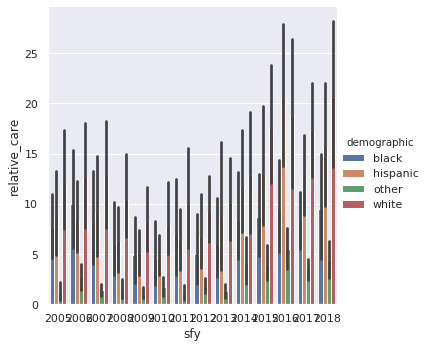

In [166]:
# Placements by year and ethnicity
sns.catplot(x = 'sfy',
            y = 'relative_care',
            hue = 'demographic',
            kind = 'bar',
            data = df_tidy);

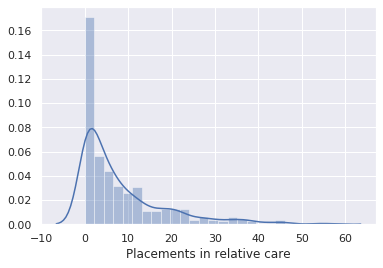

In [168]:
import seaborn as sns
# See if a Seaborn distribution plot tells us anything
x = pd.Series(df_dcf['relative_care'], name='Placements in relative care')
sns.distplot(x)

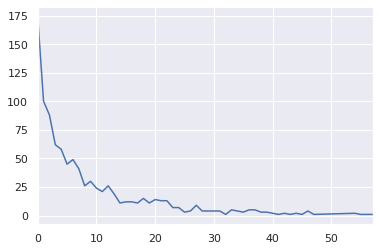

In [169]:
# Line plot shows that values for 'relative_care' are not normally distributed
df_dcf['relative_care'].value_counts().sort_index().plot()

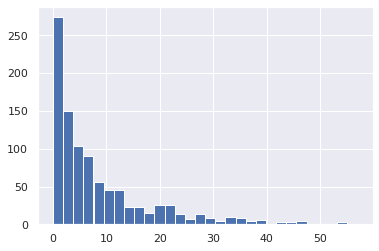

In [170]:
# Histogram shows the same thing in a different way
df_dcf['relative_care'].hist(bins=30)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


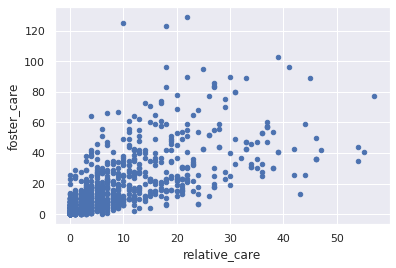

In [171]:
# I wonder if there is some linear relationship between, relative_care
# and foster_care? Seems yes...but that doesn't really get me anything
df_dcf.plot.scatter('relative_care', 'foster_care')

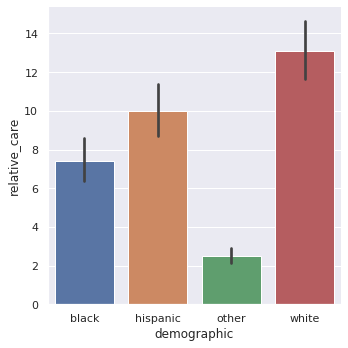

In [172]:
# White and Hispanic have higher average relative care placements per reporting unit (office-year)
import seaborn as sns
sns.catplot(x = 'demographic',
            y = 'relative_care',
            kind = 'bar',
            data = df_dcf);

In [173]:
# Numbers for the histogram above
print('Mean rate of relative care placement')
print('OVERALL', round(df_dcf.relative_care.mean(), 2))
print('Hispanic:', round(df_dcf[df_dcf['demographic'] == 'hispanic'].relative_care.mean(), 2))
print('Black:', round(df_dcf[df_dcf['demographic'] == 'black'].relative_care.mean(), 2))
print('White:', round(df_dcf[df_dcf['demographic'] == 'white'].relative_care.mean(), 2))
print('Other:', round(df_dcf[df_dcf['demographic'] == 'other'].relative_care.mean(), 2))

Mean rate of relative care placement
OVERALL 8.33
Hispanic: 9.98
Black: 7.41
White: 13.11
Other: 2.5


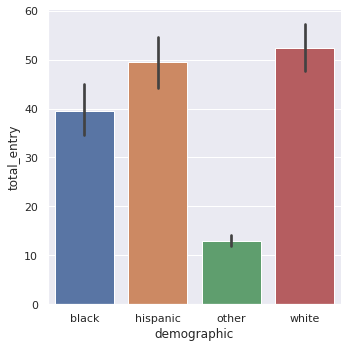

In [174]:
# But there are many more White children in care
sns.catplot(x = 'demographic',
            y = 'total_entry',
            kind = 'bar',
            data = df_dcf);

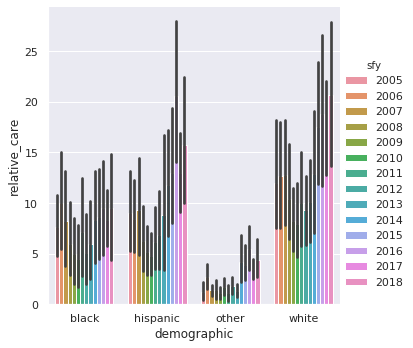

In [175]:
sns.catplot(x = 'demographic',
            y = 'relative_care',
            hue = 'sfy',
            kind = 'bar',
            data = df_dcf);

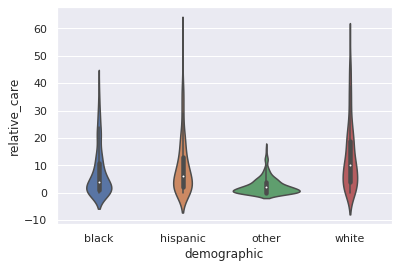

In [176]:
# Violin plot gives more detail on the difference between ethnicities.
# Specifically, White and Hispanic have a few entries with very high numbers.
sns.violinplot(x='demographic', y='relative_care', data=df_dcf);

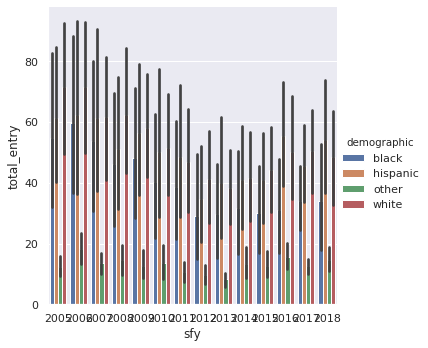

In [177]:
# Placements by year and ethnicity
sns.catplot(x = 'sfy',
            y = 'total_entry',
            hue = 'demographic',
            kind = 'bar',
            data = df_dcf);

In [178]:
df_dcf[df_dcf['demographic']=='white'].describe()

,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,2011.873984,52.337398,21.219512,13.109756,2.105691,1.032520,3.715447,2.211382,0.902439,4.504065,0.093496,0.617886,0.569106,1.857724,0.398374
std,4.093346,38.806532,18.961201,11.934179,2.535666,1.431055,5.367355,2.423531,1.321191,5.792851,0.331044,0.943466,1.379626,2.699978,0.769201
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,22.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,41.500000,16.000000,10.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,78.000000,33.000000,19.000000,3.000000,2.000000,5.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000
max,2018.000000,189.000000,90.000000,54.000000,12.000000,8.000000,24.000000,12.000000,7.000000,40.000000,2.000000,6.000000,10.000000,18.000000,4.000000


In [0]:
# Make a column showing ratio of relative care placements to all placements for each column
df_dcf['relative_care_ratio'] = df_dcf['relative_care'] / df_dcf['total_entry']

In [180]:
df_dcf['relative_care_ratio'].describe()

count    966.000000
mean       0.204059
std        0.169165
min        0.000000
25%        0.075481
50%        0.181818
75%        0.304986
max        1.000000
Name: relative_care_ratio, dtype: float64

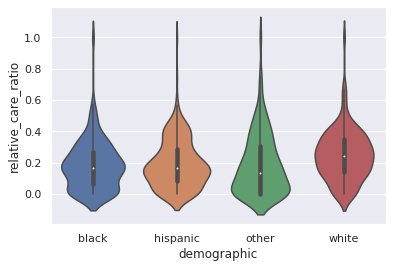

In [181]:
sns.violinplot(x='demographic', y='relative_care_ratio', data=df_dcf);

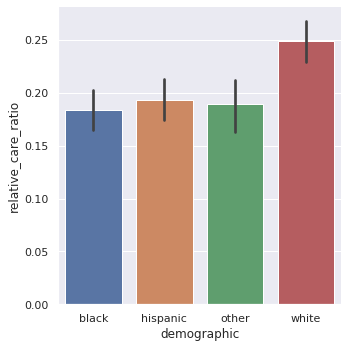

In [182]:
# As a percentage, Hispanic relative care placement rates are similar to Other and Black
sns.catplot(x = 'demographic',
            y = 'relative_care_ratio',
            kind = 'bar',
            data = df_dcf);

### ANOVA

Comparing multiple means with a series of pairwise comparisons is not accurate. We should use an Analysis of Variance Test or an ANOVA. This is a generalization of t-tests to more than two groups. Our null hypothesis states that there are equal means in the populations from which the groups of data were sampled. More succinctly:

𝜇1=𝜇2=...=𝜇𝑛

for 𝑛 groups of data. Our alternative hypothesis would be that any one of the equivalences in the above equation fail to be met.

In [183]:
import scipy.stats as stats
hispanic = df_dcf[df_dcf['demographic'] == 'hispanic'].relative_care
black = df_dcf[df_dcf['demographic'] == 'black'].relative_care
white = df_dcf[df_dcf['demographic'] == 'white'].relative_care
other = df_dcf[df_dcf['demographic'] == 'other'].relative_care
stats.f_oneway(hispanic, black, white, other)

F_onewayResult(statistic=54.71841609479271, pvalue=1.1661511214609272e-32)

## Future directions

If I replace the strings as numbers, I could run k-means testing to look for clusters. The presumption here would be that we could get a label later indicating the success of the placement, for example did it last for six months, full course of treatment, etc.

It would be interesting to put these on a map of the state of Connecticut.

It would also be very interesting to analyze the differences between each group.